# Excitatory Neurons

In [ ]:
!wget https://us-east-2-scprojectdata.s3.us-east-2.amazonaws.com/p6mouse/patterns_anndata.h5ad

In [1]:
# ! pip install scanpy
# ! pip install scProject -U
import scProject
import numpy as np
import scanpy as sc

In [2]:
patterns = sc.read_h5ad('patterns_anndata.h5ad')
dataset = sc.read_h5ad('test_target.h5ad')
dataset_filtered, patterns_filtered = scProject.matcher.filterAnnDatas(dataset, patterns, 'gene_id')

(55371, 428) dataset filter shape
(80, 428) patterns filter shape


Trying to set attribute `.X` of view, copying.
Trying to set attribute `.X` of view, copying.


Weight .001 only 1% lasso to encourage as many features to show up. Then, we will increase the lasso and the regularization to see what drops out.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


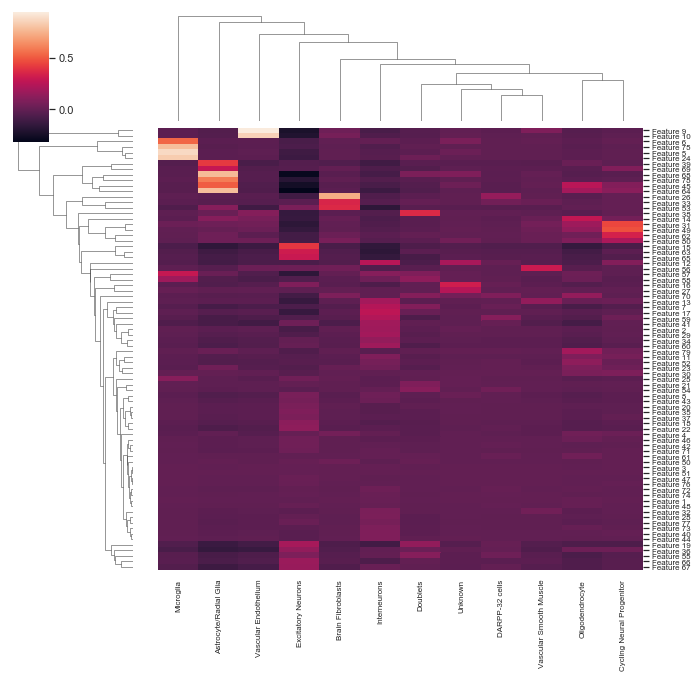

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'EN01', .0001, .01)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'EN01', 'PearsonEN01', True)

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


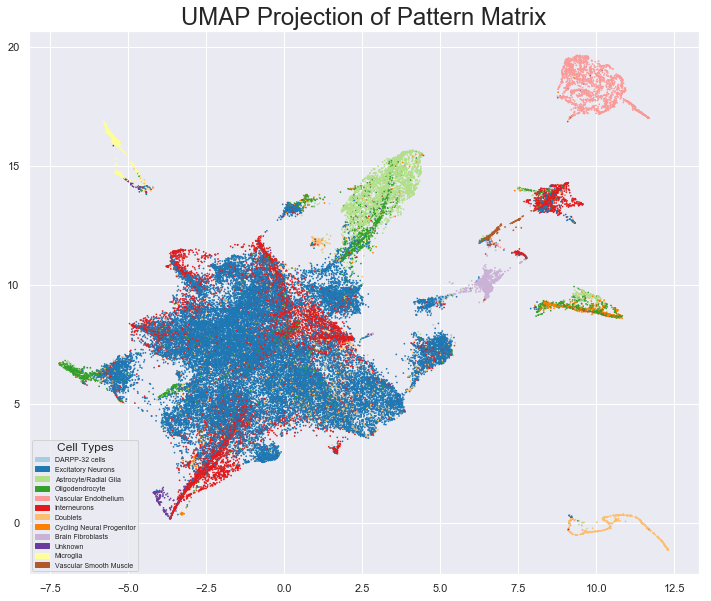

In [4]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'EN01', 'UMAPEN01', 20)

Since there is so much heterogeneity in excitatory neurons features could have an unimpressive pearson value, but still be a driver of one cluster of excitatory neurons. These features are obviously valuable in uderstanding the sub types of excitatory neurons. While it is inconvenient to look through all of the plots, it is the easiest way to find the interesting ones. For brevity, I condensed it down from the 80 to the interesting ones for this notebook. This is a lot of features so I am going to regress again with a higher lasso to see which ones dropout. There dropout does not mean that they are not important, but rather that they are not the strongest drivers.

Number of nonzero cells 26824


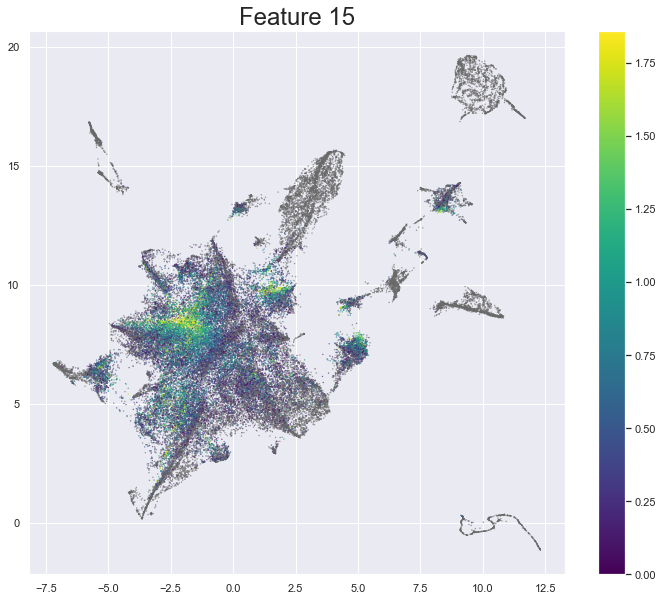

Number of nonzero cells 22125


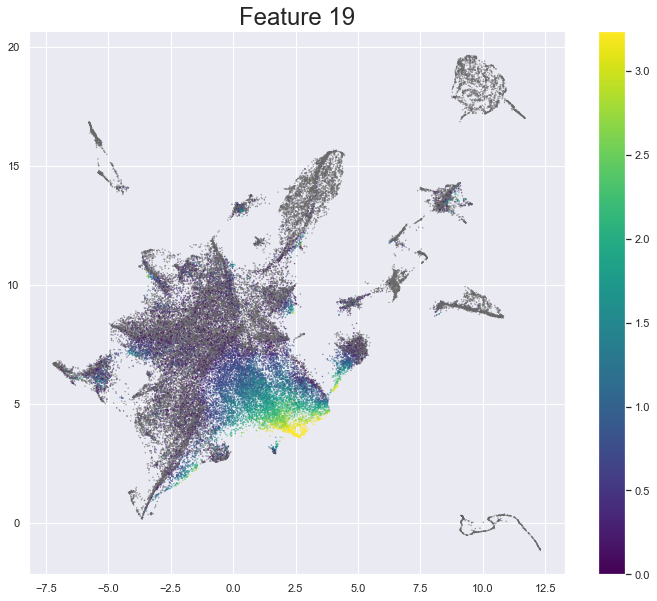

Number of nonzero cells 27057


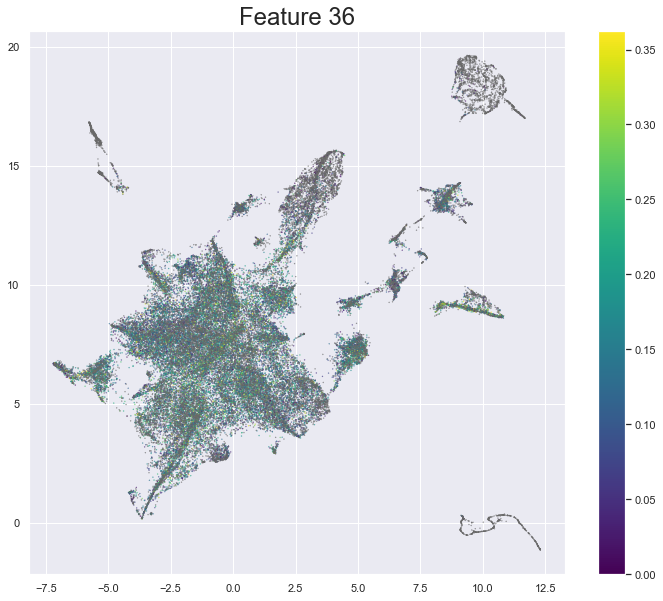

Number of nonzero cells 27606


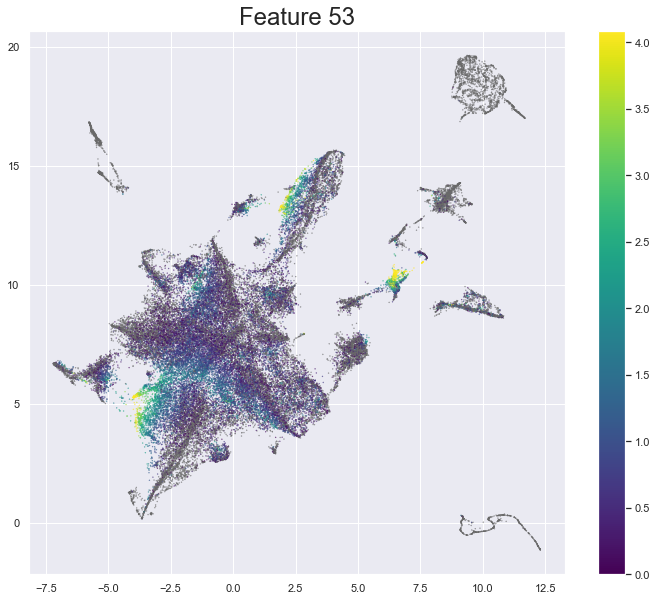

Number of nonzero cells 15473


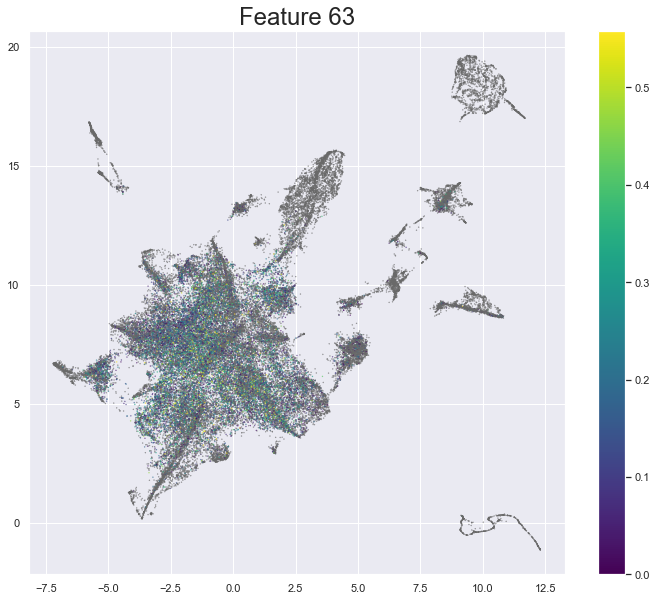

Number of nonzero cells 11256


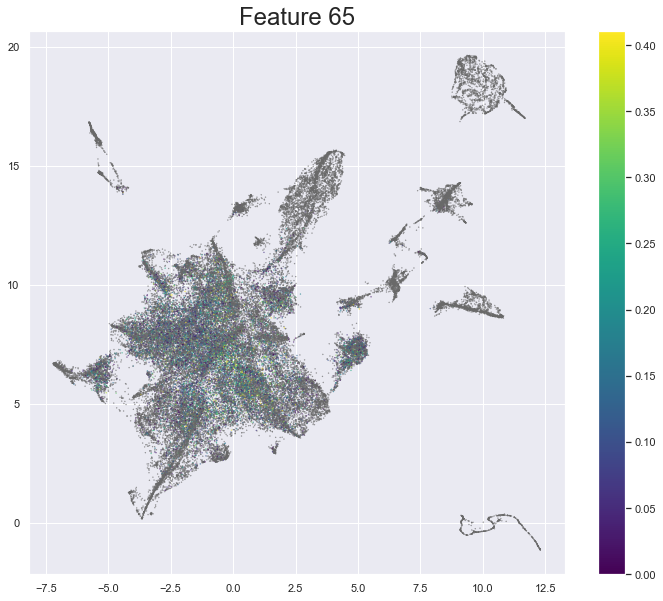

Number of nonzero cells 20662


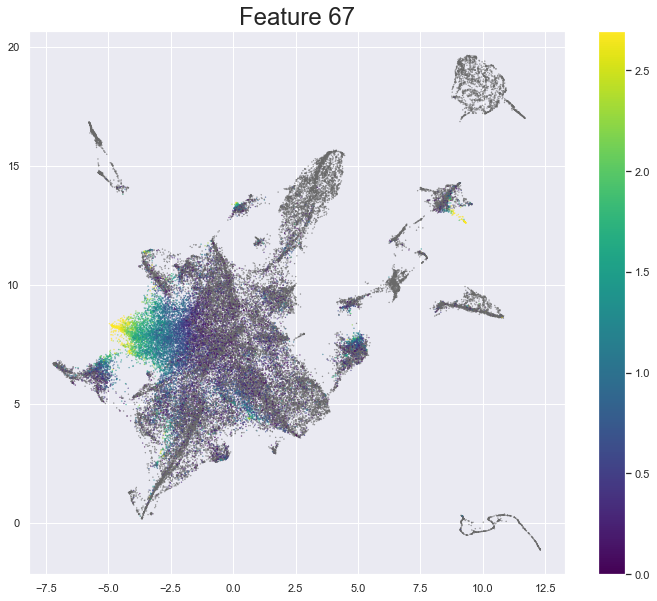

In [5]:
scProject.viz.featurePlots(dataset_filtered, [15, 19, 36, 53, 63, 65, 67], 'EN01', 'UMAPEN01')

While the other features are lighting up some sub types of excitatory neurons feature 36 looks really interesting because it only lights up half of each cluster it is expressed in. Next, I am going to up the lasso to 75% to see which features are the strongest drivers.

(55371, 80)
[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


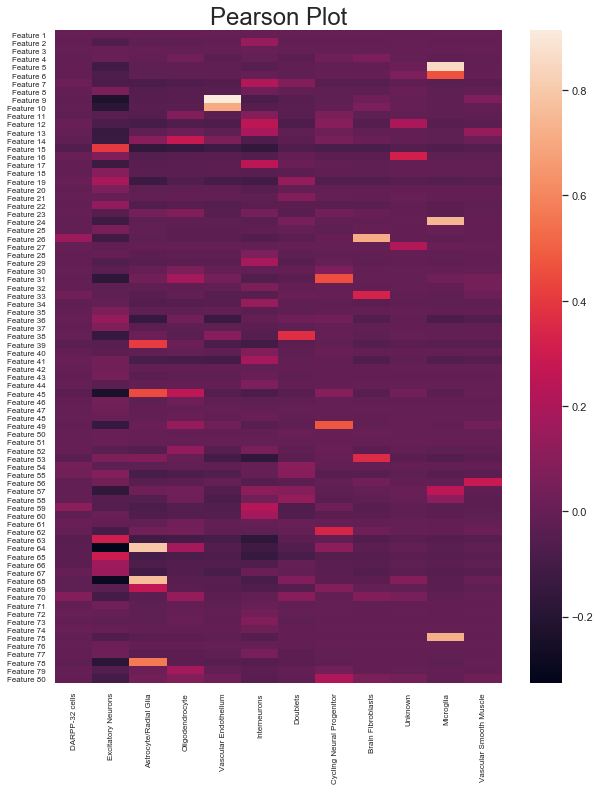

In [6]:
plt.rcParams['figure.figsize']= [10, 12]
scProject.rg.NNLR_ElasticNet(dataset_filtered, patterns_filtered, 'EN60', .0001, .75)
scProject.viz.pearsonMatrix(dataset_filtered, patterns_filtered, 'CellType', 12, 'EN60', 'PearsonEN60', True, row_cluster=False, col_cluster=False)

[DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, Vascular Endothelium, ..., Cycling Neural Progenitor, Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]
Length: 12
Categories (12, object): [DARPP-32 cells, Excitatory Neurons, Astrocyte/Radial Glia, Oligodendrocyte, ..., Brain Fibroblasts, Unknown, Microglia, Vascular Smooth Muscle]


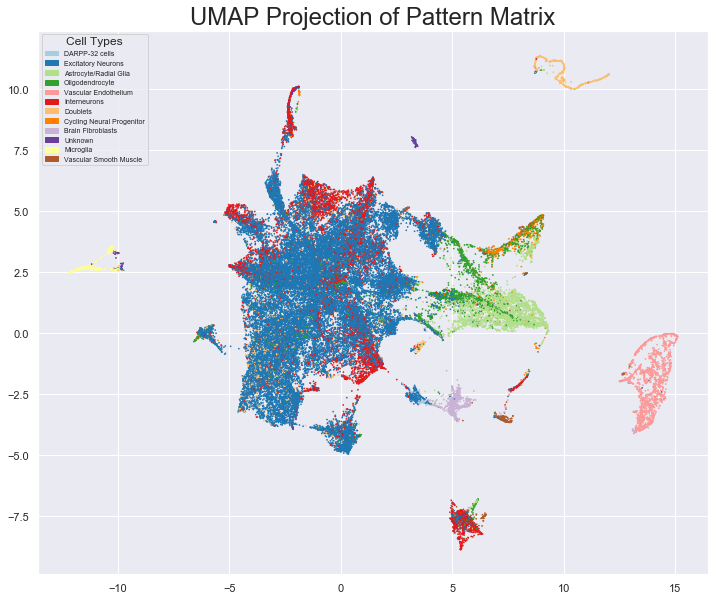

In [7]:
plt.rcParams['figure.figsize']= [12, 10]
scProject.viz.UMAP_Projection(dataset_filtered, 'CellType', 'EN60', 'UMAPEN60', 20)

Because of how scProject is set up we can use the UMAP coordinates from another regression and put new feature weights onto it this can allow the user to see how things changed on the same UMAP coordinates. Feature 20 goes to 0,

Number of nonzero cells 25882


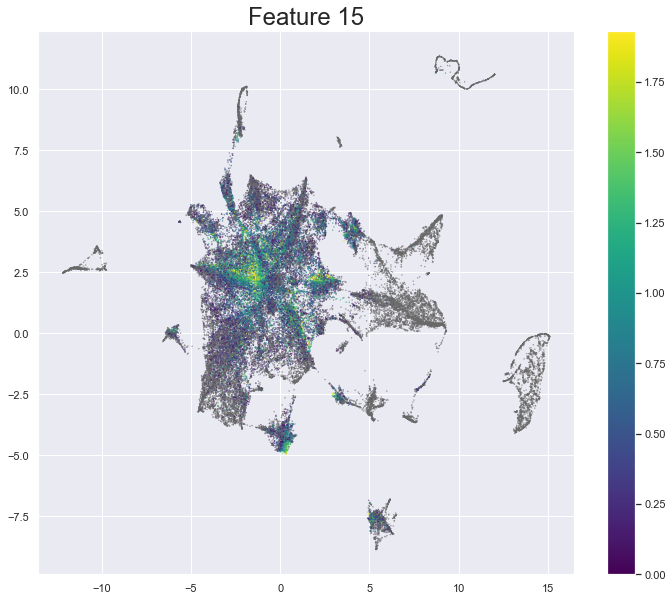

Number of nonzero cells 19884


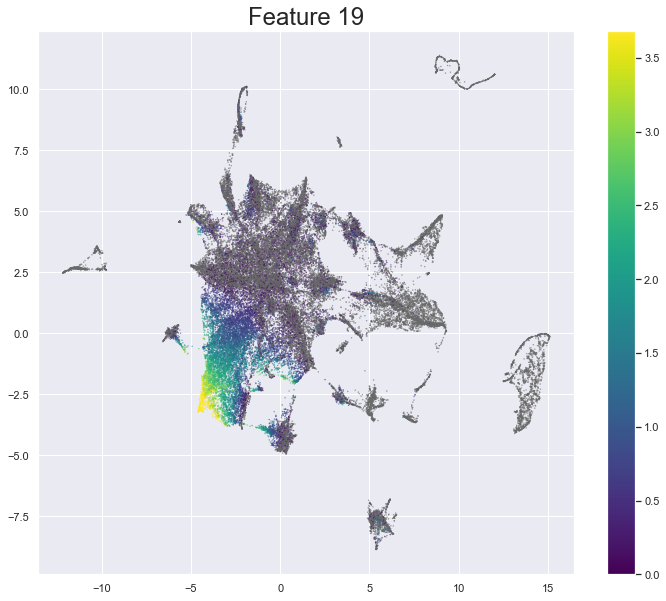

Number of nonzero cells 26945


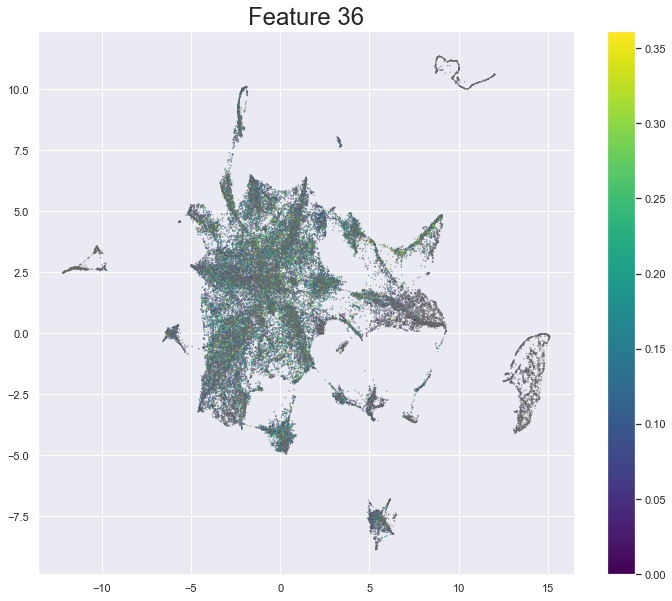

Number of nonzero cells 15339


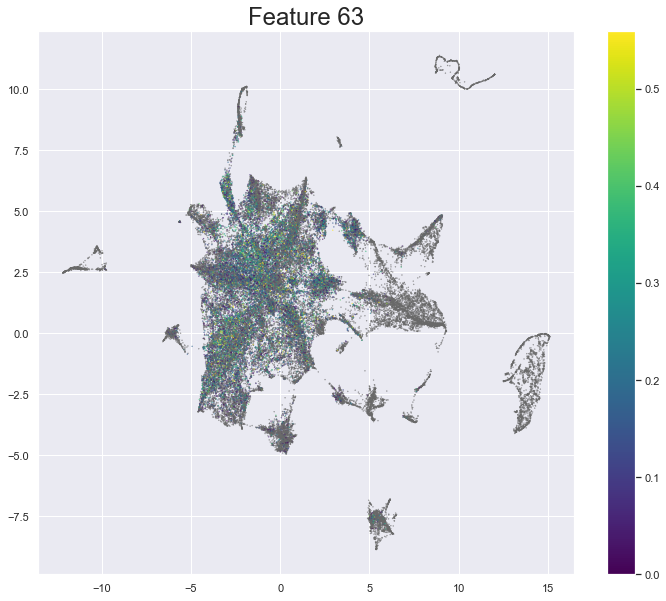

Number of nonzero cells 11176


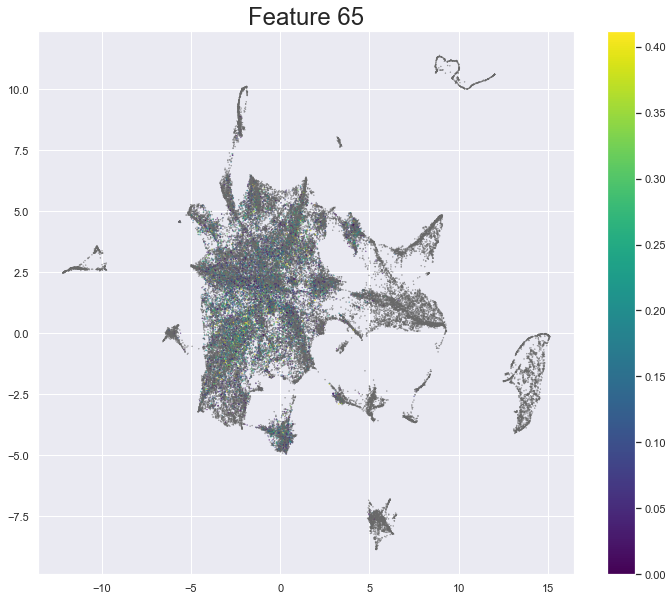

In [8]:
scProject.viz.featurePlots(dataset_filtered, [15, 19, 36, 63, 65], 'EN60', 'UMAPEN60')

In [9]:
print(scProject.stats.importantGenes(patterns_filtered, 36, .1))
print(scProject.stats.importantGenes(patterns_filtered, 39, .1))
print(scProject.stats.importantGenes(patterns_filtered, 58, .1))
print(scProject.stats.importantGenes(patterns_filtered, 19, .1))

[Index(['ENSMUSG00000086503', 'ENSMUSG00000092341'], dtype='object', name='index')]
[Index(['ENSMUSG00000005089', 'ENSMUSG00000027210', 'ENSMUSG00000027447',
       'ENSMUSG00000049775', 'ENSMUSG00000002985', 'ENSMUSG00000019874',
       'ENSMUSG00000039714', 'ENSMUSG00000041329', 'ENSMUSG00000052727',
       'ENSMUSG00000021190', 'ENSMUSG00000021268', 'ENSMUSG00000001270',
       'ENSMUSG00000022799'],
      dtype='object', name='index')]
[Index(['ENSMUSG00000007891', 'ENSMUSG00000021939', 'ENSMUSG00000001175',
       'ENSMUSG00000068220'],
      dtype='object', name='index')]
[Index(['ENSMUSG00000010175', 'ENSMUSG00000067786', 'ENSMUSG00000027581',
       'ENSMUSG00000027500', 'ENSMUSG00000037852', 'ENSMUSG00000022054',
       'ENSMUSG00000022055', 'ENSMUSG00000045532', 'ENSMUSG00000045136',
       'ENSMUSG00000052727', 'ENSMUSG00000021087', 'ENSMUSG00000066392',
       'ENSMUSG00000021268', 'ENSMUSG00000001270', 'ENSMUSG00000045763'],
      dtype='object', name='index')]


Now these are ensemble ids so I just used https://www.syngoportal.org/convert.html to convert them to gene names.
For Feature 36 the by far highest expressed gene is inactive X specific transcripts(Xist). This dataset is 50% male and 50% female so it would make sense that feature 36 lights up half of the clusters(the female cells).

Feature 39:
ENSMUSG00000041329	ATPase, Na+/K+ transporting, beta 2 polypeptide
ENSMUSG00000001270	creatine kinase, brain
ENSMUSG00000019874	fatty acid binding protein 7, brain
ENSMUSG00000052727	microtubule-associated protein 1B
ENSMUSG00000021268	maternally expressed 3

Feature 58:
ENSMUSG00000021939	cathepsin B 
Very sparse cathepsin B is really high.


Let's visualize the expression of the Xist gene.

Feature 36 expresses 82.06098079681396% of gene ENSMUSG00000086503


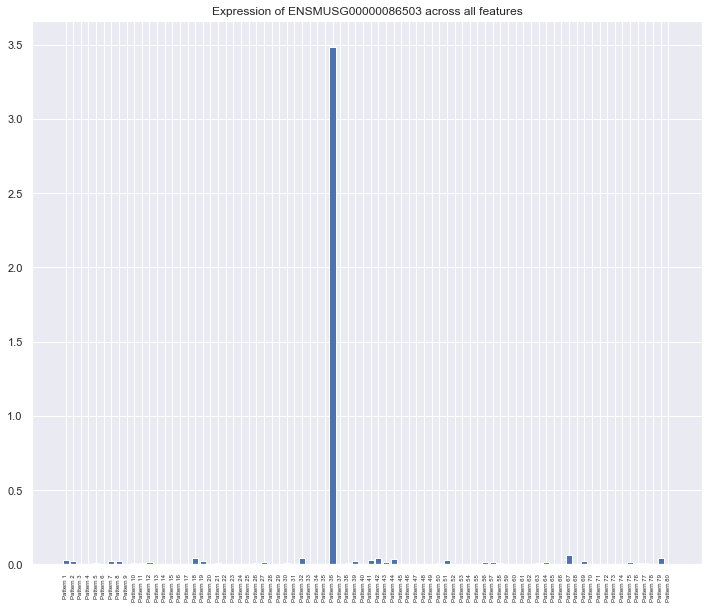

In [10]:
scProject.stats.geneSelectivity(patterns_filtered, 'ENSMUSG00000086503', 36, True)

Here we confirm that feature 36 is one of the largest "expressors" of the Xist in the retina patterns. Since feature 36 is not correlated with a specific cell type, we chose not to use the gene drivers method.

In [11]:
exc = dataset_filtered[dataset_filtered.obs['CellType'].isin(['Excitatory Neurons'])]
print(exc.shape)
E1 = exc[exc.obsm['EN01'][:, 35] > 0]
E2 = exc[exc.obsm['EN01'][:, 35] == 0]
E1.X = np.log1p(E1.X)
E2.X = np.log1p(E2.X)
print(E1.X.shape)
print(E2.X.shape)

(33678, 428)
(18695, 428)
(14983, 428)


In [12]:
scProject.stats.HotellingT2(E1, E2)

T2 Value: 225979.13222709703 FValue: 521.2939140369767 P-Value: 1.1102230246251565e-16


(ArrayView([[225979.1322271]]),
 ArrayView([[521.29391404]]),
 array([[1.11022302e-16]]))

In [13]:
df= scProject.stats.BonferroniCorrectedDifferenceMeans(E1, E2, .9999999999999, 'gene_short_name')

Gene Name: Ramp1 Mean Difference: 0.026904910802841187 Low: 0.0026441250541557847 High 0.051165696551526585
Gene Name: Pam Mean Difference: 0.03626716136932373 Low: 0.0006223749459358593 High 0.0719119477927116
Gene Name: Cntnap5a Mean Difference: 0.05637076497077942 Low: 0.01907342966758977 High 0.09366810027396907
Gene Name: Lypd1 Mean Difference: 0.060535117983818054 Low: 0.021008254722879927 High 0.10006198124475618
Gene Name: Brinp3 Mean Difference: -0.03390157222747803 Low: -0.06507916283876622 High -0.0027239816161898286
Gene Name: Atp1b1 Mean Difference: -0.04790063202381134 Low: -0.07320946171526001 High -0.022591802332362677
Gene Name: Ptgds Mean Difference: 0.028799064457416534 Low: 0.008456278734419825 High 0.04914185018041324
Gene Name: Snhg11 Mean Difference: 0.05193324387073517 Low: 0.02137099304428081 High 0.08249549469718953
Gene Name: Serinc3 Mean Difference: -0.05014920234680176 Low: -0.08513573774017022 High -0.015162666953433303
Gene Name: Xist Mean Difference: 0.5

In [14]:
filt = ((df['High']> 0) & (df['Low']>0)) | ((df['High']<0) & (df['Low']<0))
df = df[filt]
df['diff'] = df['High'].sub(df['Low'], axis = 0) 
df.sort_values('diff')

# This difference shows that the Xist gene has the lowest variance of the genes.

,Low,High,diff
gene_short_name,,,
Xist,0.574245,0.595835,0.021589
Cldn5,0.003526,0.030500,0.026974
Fabp7,-0.039324,-0.011227,0.028097
Meg3,0.073866,0.107625,0.033759
Nts,0.002398,0.039527,0.037129
Stmn2,0.002587,0.040024,0.037437
Itm2a,-0.041661,-0.001322,0.040339
Ptgds,0.008456,0.049142,0.040686
Hba-a1,0.007488,0.050012,0.042524
